# Tarea 4: procesamiento de texto parte 1

Importando librerias relevantes para la tarea

In [318]:
#procesamiento del texto 
import pandas as pd
import os
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
#representación del texto 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Para esta tarea, se utilizará la base de IMDB, la cual contiene críticas por parte de los usarios hacia peliculas que han visto. Específicamente, se han escogido aleatoriamente 8 críticas negativas y positivas para identificar cuales son las palabras más utilizadas por los críticos a la hora de evaluar negativamente/positivamente una película. 

In [319]:
textonegative= os.path.join('data', 'moviereviews_nega.txt')
texttablenega=pd.read_table(textonegative, header=None)

In [320]:
textopositive=os.path.join('data','moviereviews_pos.txt')
texttablepos=pd.read_table(textopositive, header=None)

In [321]:
texttablenega.drop(columns=[1,2,3,4,5,6,7,8,9,10,11],inplace=True)
texttablepos.drop(columns=[1,2,3,4,5,6],inplace=True)

In [322]:
texttablenega.dropna(subset=[0],inplace=True)

In [323]:
texttablepos.dropna(subset=[0],inplace=True)

In [324]:
texttablepos.reset_index(inplace=True)
texttablenega.reset_index(inplace=True)

In [325]:
texttablepos[0].str.split()

0    [If, you, like, original, gut, wrenching, laug...
1    [This, a, fantastic, movie, of, three, prisone...
2    [Some, films, just, simply, should, not, be, r...
3    [I, remember, this, film,it, was, the, first, ...
4    [What, an, absolutely, stunning, movie,, if, y...
5    [The, Karen, Carpenter, Story, shows, a, littl...
6    [A, wonderful, little, production., <br, /><br...
7    [I, thought, this, was, a, wonderful, way, to,...
Name: 0, dtype: object

In [326]:
texttablenega[0].str.split()

0    [Encouraged, by, the, positive, comments, abou...
1    [Phil, the, Alien, is, one, of, those, quirky,...
2    [I, saw, this, movie, when, I, was, about, 12,...
3    [The, cast, played, Shakespeare.<br, /><br, />...
4    [Kind, of, drawn, in, by, the, erotic, scenes,...
5    [An, awful, film!, It, must, have, been, up, a...
6    [I, had, the, terrible, misfortune, of, having...
7    [This, was, the, worst, movie, I, saw, at, Wor...
Name: 0, dtype: object

In [327]:
texttablenega[0]=texttablenega[0].str.lower()
texttablepos[0]=texttablepos[0].str.lower()

In [328]:
texttablepos

,index,0
0,0,if you like original gut wrenching laughter yo...
1,1,this a fantastic movie of three prisoners who ...
2,2,some films just simply should not be remade. t...
3,3,"i remember this film,it was the first film i h..."
4,5,"what an absolutely stunning movie, if you have..."
5,6,the karen carpenter story shows a little more ...
6,7,a wonderful little production. <br /><br />the...
7,8,i thought this was a wonderful way to spend ti...


In [329]:
texttablenega

,index,0
0,0,encouraged by the positive comments about this...
1,1,phil the alien is one of those quirky films wh...
2,2,i saw this movie when i was about 12 when it c...
3,3,the cast played shakespeare.<br /><br />shakes...
4,4,"kind of drawn in by the erotic scenes, only to..."
5,6,an awful film! it must have been up against so...
6,7,i had the terrible misfortune of having to vie...
7,9,this was the worst movie i saw at worldfest an...


In [330]:
#seriestextnega=pd.Series(np.concatenate(texttablenega[0].str.split()))
seriestextposi=pd.Series(np.concatenate(texttablepos[0].str.split()))

In [331]:
seriestextnega=pd.Series(np.concatenate(texttablenega[0].str.split()))

In [332]:
seriestextnega

0          encouraged
1                  by
2                 the
3            positive
4            comments
            ...      
1122               in
1123            those
1124    standards.<br
1125            /><br
1126      />,negative
Length: 1127, dtype: object

In [333]:
seriestextposi

0                     if
1                    you
2                   like
3               original
4                    gut
             ...        
860                   to
861                   go
862                  see
863                 with
864    friends.,positive
Length: 865, dtype: object

In [334]:
seriestextnega=seriestextnega.str.replace('br','')
seriestextposi=seriestextposi.str.replace('br','')

In [335]:
puntos= string.punctuation
seriestextnega=seriestextnega.str.replace('['+puntos+']','', regex=True)
seriestextposi=seriestextposi.str.replace('['+puntos+']','', regex=True)

In [336]:
seriestextposi

0                   if
1                  you
2                 like
3             original
4                  gut
            ...       
860                 to
861                 go
862                see
863               with
864    friendspositive
Length: 865, dtype: object

In [337]:
seriestextposi.value_counts()

the                57
of                 28
a                  26
and                23
is                 19
                   ..
nearest             1
shame               1
big                 1
hell                1
friendspositive     1
Name: count, Length: 430, dtype: int64

In [338]:
seriestextnega.value_counts()

the         72
of          32
a           28
to          27
i           26
            ..
since        1
point        1
notice       1
took         1
negative     1
Name: count, Length: 493, dtype: int64

Eliminamos los stopwords

In [339]:
STOPS=stopwords.words('english')
seriestextnega=seriestextnega[~seriestextnega.isin(STOPS)].reset_index(drop=True)
seriestextposi=seriestextposi[~seriestextposi.isin(STOPS)].reset_index(drop=True)

In [340]:
seriestextposi.value_counts()

                   14
movie               8
film                7
one                 5
great               5
                   ..
club                1
fitness             1
turned              1
knowthe             1
friendspositive     1
Name: count, Length: 352, dtype: int64

In [341]:
seriestextnega.value_counts()

                 25
film             14
movie            10
one               8
story             6
                 ..
screenwriters     1
since             1
point             1
notice            1
negative          1
Name: count, Length: 409, dtype: int64

<Axes: ylabel='Frequency'>

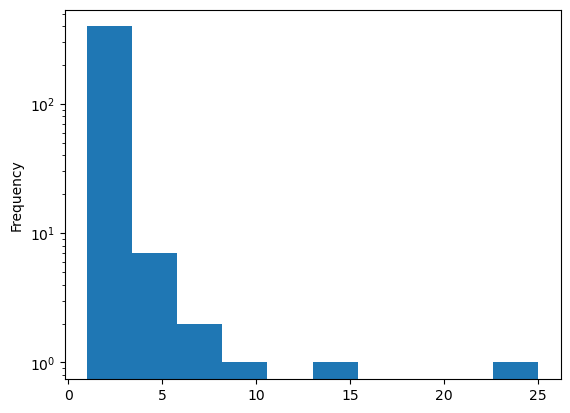

In [342]:
seriestextnega.value_counts().plot(logy=True, kind='hist')

In [343]:
positivereviewwords=seriestextposi.value_counts()[seriestextposi.value_counts()>2]
negativereviewwords=seriestextnega.value_counts()[seriestextnega.value_counts()>2]

In [344]:
positivereviewwords.to_dict()
negativereviewwords.to_dict()

{'': 25,
 'film': 14,
 'movie': 10,
 'one': 8,
 'story': 6,
 'shakespeare': 4,
 'films': 4,
 'like': 4,
 'saw': 4,
 'end': 4,
 'good': 4,
 'least': 4,
 'even': 3,
 'would': 3,
 'worst': 3,
 'ridiculous': 3,
 'something': 3,
 'pretty': 3,
 'better': 3,
 'bad': 3,
 'bmovie': 3,
 'could': 3}

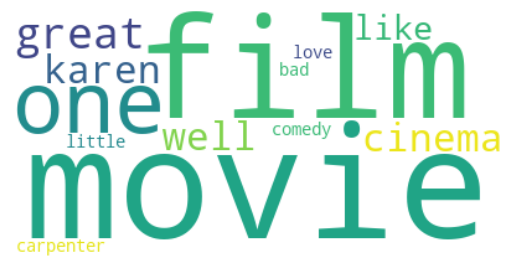

In [346]:
wcopositive = WordCloud(background_color='white')
wcopositive.generate_from_frequencies(frequencies=positivereviewwords.to_dict())
plt.figure()
plt.imshow(wcopositive, interpolation="bilinear")
plt.axis("off")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

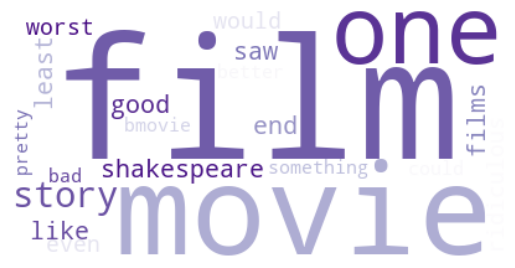

In [348]:
wcnegative=WordCloud(background_color='white', colormap= 'Purples')
wcnegative.generate_from_frequencies(frequencies=negativereviewwords.to_dict())
plt.figure()
plt.imshow(wcnegative, interpolation='bilinear')
plt.axis('off')
plt.show

En ambos tipos de reviews las palabras que mas resaltan hace referencia al objeto del análisis: una pelicula. En el caso de las reviews positivas, las personas utilizan palabras como "great", "good", "love" para demostrar su aprecio por las peliculas analizadas. En el caso de las reviews negativas, se utilizan palabras como "bad", "worst", "least" para demostrar el descontento. 